In [1]:
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation, Flatten
from keras.utils import np_utils
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
word_data = ['반신반의','백전백승', '분골쇄신', '새옹지마','죽마고우', '진퇴양란', '칠전팔기', '오매불망']
char_list = ['반','신','의','백', '전', '승', '분', '골', '쇄', '새', '옹','지','마', '죽', '고', '우','진','퇴','양','란', '칠','팔','기','오','매','불','망']
num_dict = dict ((num, x) for x, num in enumerate(char_list))

n_vocab = (len(char_list))
print('문자의 개수:', n_vocab)

문자의 개수: 27


In [3]:
num_dict

{'고': 14,
 '골': 7,
 '기': 22,
 '란': 19,
 '마': 12,
 '망': 26,
 '매': 24,
 '반': 0,
 '백': 3,
 '분': 6,
 '불': 25,
 '새': 9,
 '쇄': 8,
 '승': 5,
 '신': 1,
 '양': 18,
 '오': 23,
 '옹': 10,
 '우': 15,
 '의': 2,
 '전': 4,
 '죽': 13,
 '지': 11,
 '진': 16,
 '칠': 20,
 '퇴': 17,
 '팔': 21}

In [0]:
seq_setp = 3
len_data = len(word_data)

In [0]:
input_networks = []
output_networks = []

for data in word_data:
  input = [num_dict[n] for n in data[:-1]]
  output = num_dict[data[-1]]
  input_networks.append(np.eye(len(num_dict))[input])
  output_networks.append([output])

In [7]:
output_networks

[[2], [5], [1], [12], [15], [19], [22], [26]]

In [0]:
input_networks = np.array(input_networks)

In [9]:
# vectorize
# input_networks = np.expand_dims(input_networks, -1)
print(input_networks.shape)
#normalize
input_networks = input_networks / float(n_vocab)
output_networks = np_utils.to_categorical(output_networks)

(8, 3, 27)


In [7]:
input_shape = (input_networks.shape[1], input_networks.shape[2])
input_shape

(3, 27)

#모델 생성

In [0]:
def create_network(input_networks, n_vocab):

  model = Sequential()
  model.add(LSTM(
      256, input_shape=input_shape,
      return_sequences = True
      ))
  model.add(Dropout(0.3))
  model.add(LSTM(256, return_sequences=True))
  model.add(Dropout(0.3))
  model.add(LSTM(128))
  model.add(Dense(64))
  model.add(Dropout(0.3))
  model.add(Dense(n_vocab))
  model.add(Activation('softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='rmsprop')
  return model

In [21]:
model = create_network(input_networks, n_vocab)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 3, 256)            290816    
_________________________________________________________________
dropout_7 (Dropout)          (None, 3, 256)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 3, 256)            525312    
_________________________________________________________________
dropout_8 (Dropout)          (None, 3, 256)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)               

In [22]:
batch_size=64
history =  model.fit(
            input_networks, 
            output_networks, 
            epochs = 100, 
            batch_size=batch_size, 
            validation_data=None)

Epoch 1/100
8/8 [==============================] - 1s 102ms/step - loss: 3.2958
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 3.2805
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 3.2580
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 3.2286
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 3.1554
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 3.0294
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 2.8896
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 2.5964
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 2.5031
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 2.4094
Epoch 11/100
8/8 [==============================] - 0s 4ms/step - loss: 2.5148
Epoch 12/100
8/8 [==============================] - 0s 4ms/step - loss: 2.5081
Epoch 13/100
8/8 [==============================] - 0s 5ms/

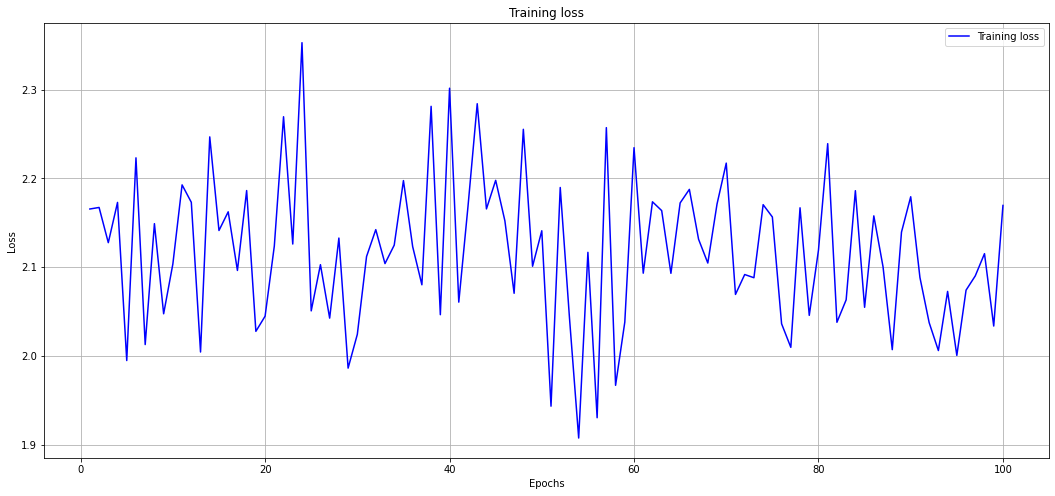

In [13]:
history_dict = history.history
loss = history_dict['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label = 'Training loss') 
plt.rcParams["figure.figsize"] = (18,8)
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['axes.grid'] = True 
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 테스트